In [1]:
%cd ..

/home/tianshu/Documents/dart


In [2]:
import h5py
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [82]:
f = h5py.File("data/cichall-4/data.h5")

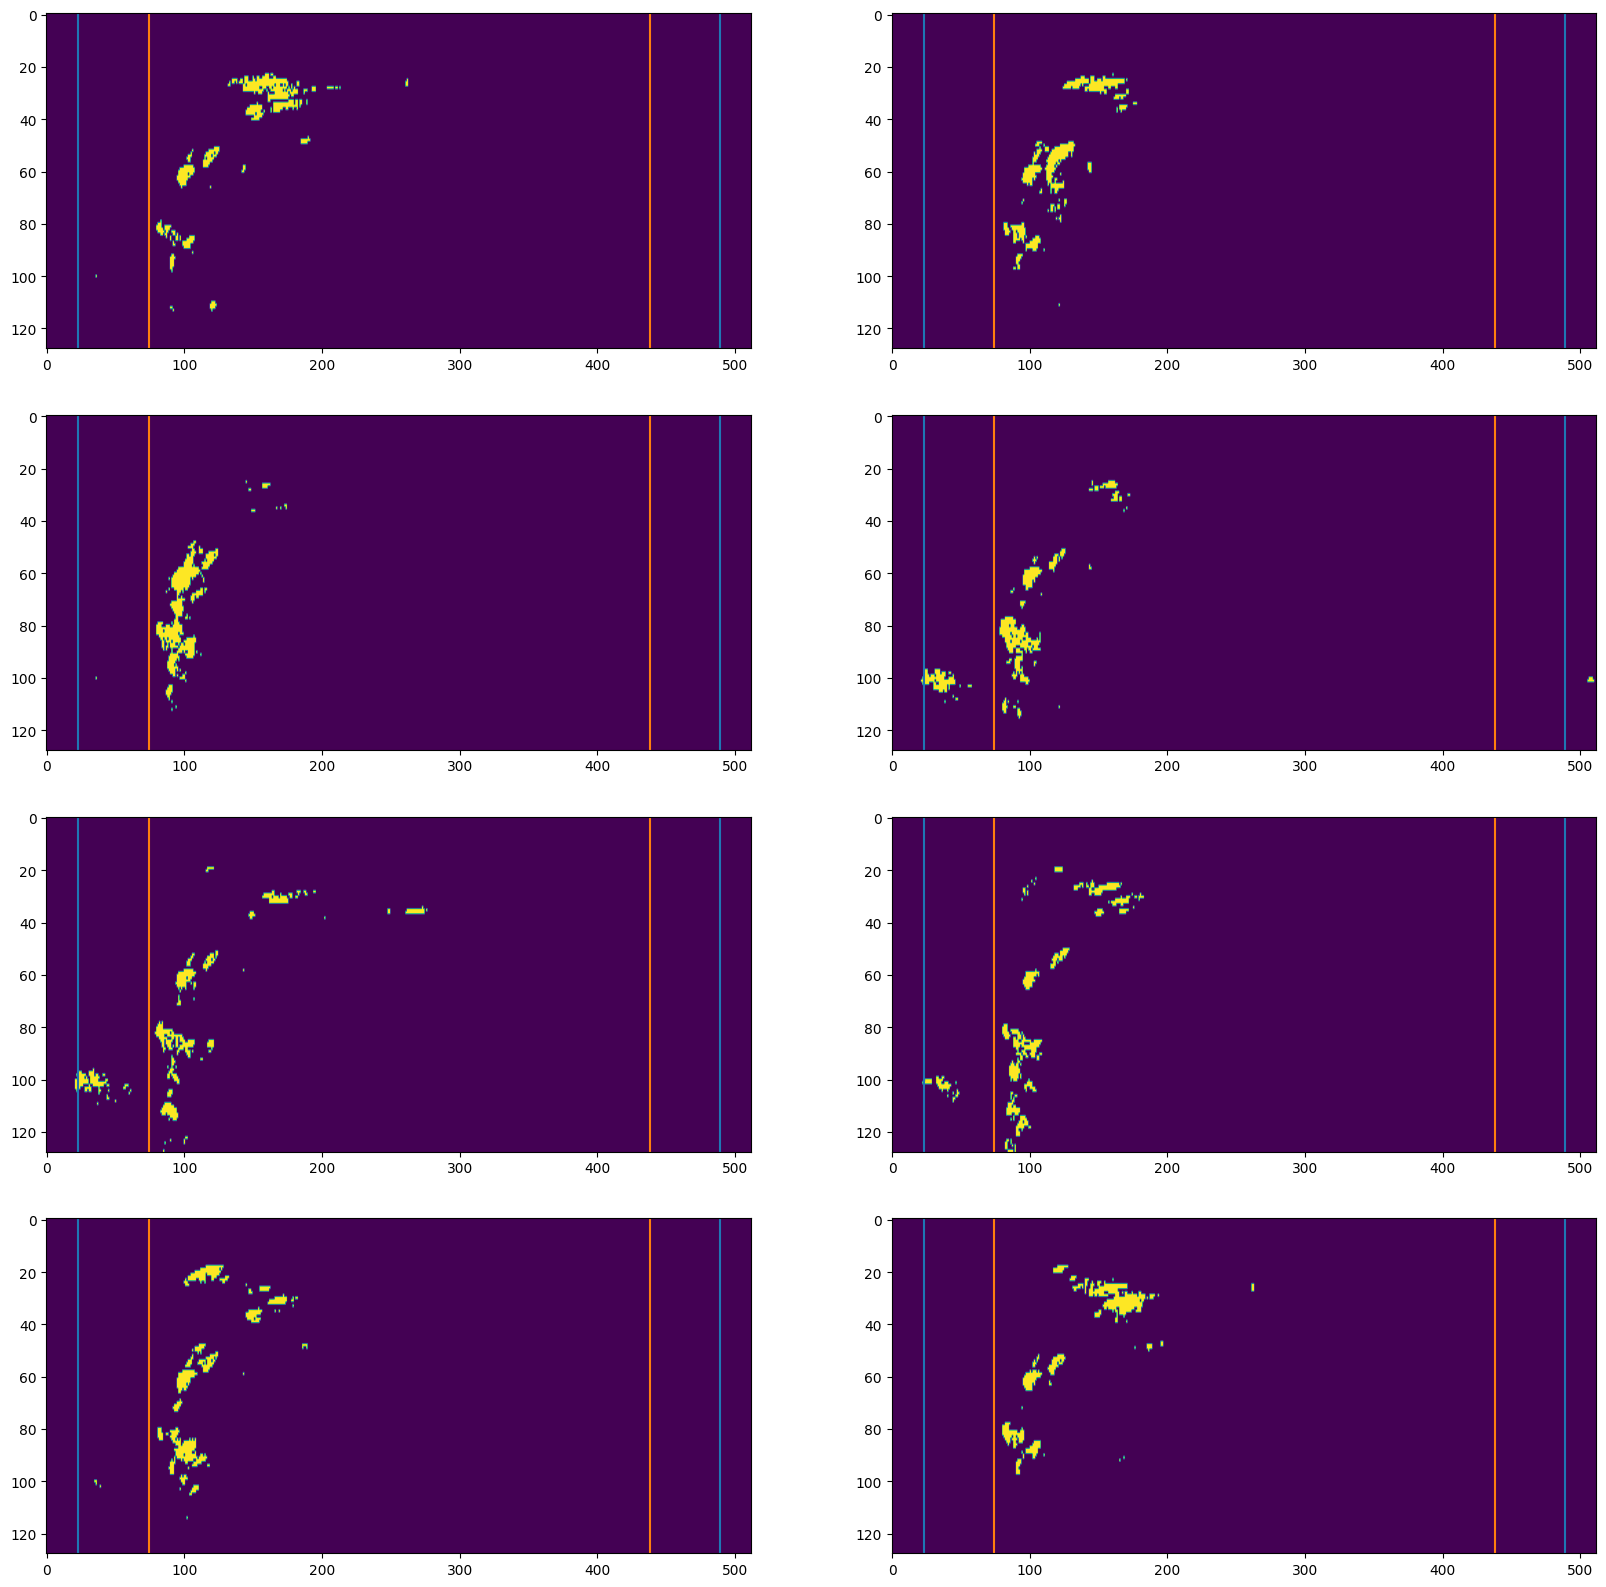

In [81]:
fig, axs = plt.subplots(4, 2, figsize=(20, 20))

N = 4150
for i, ax in enumerate(axs.reshape(-1)):
    img = f['rad'][N, :, :, i]
    ax.imshow(img > np.percentile(img, 99), aspect='auto')
    # ax.imshow(img, aspect='auto')

    v_radar = int(f['speed'][N] / 1.89 * 256)
    v_slam = int(np.linalg.norm(f['vel'][N]) / 1.89 * 256)
    ax.axvline(256 - v_radar, color='C0')
    ax.axvline(256 + v_radar, color='C0')
    ax.axvline(256 - v_slam, color='C1')
    ax.axvline(256 + v_slam, color='C1')

/tmp/ipykernel_254899/2542504579.py:7: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  vel = gaussian_filter1d(np.array(f['vel']), sigma=1.0, axis=0)
/tmp/ipykernel_254899/2542504579.py:8: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  speed_radar = np.array(f['speed'])


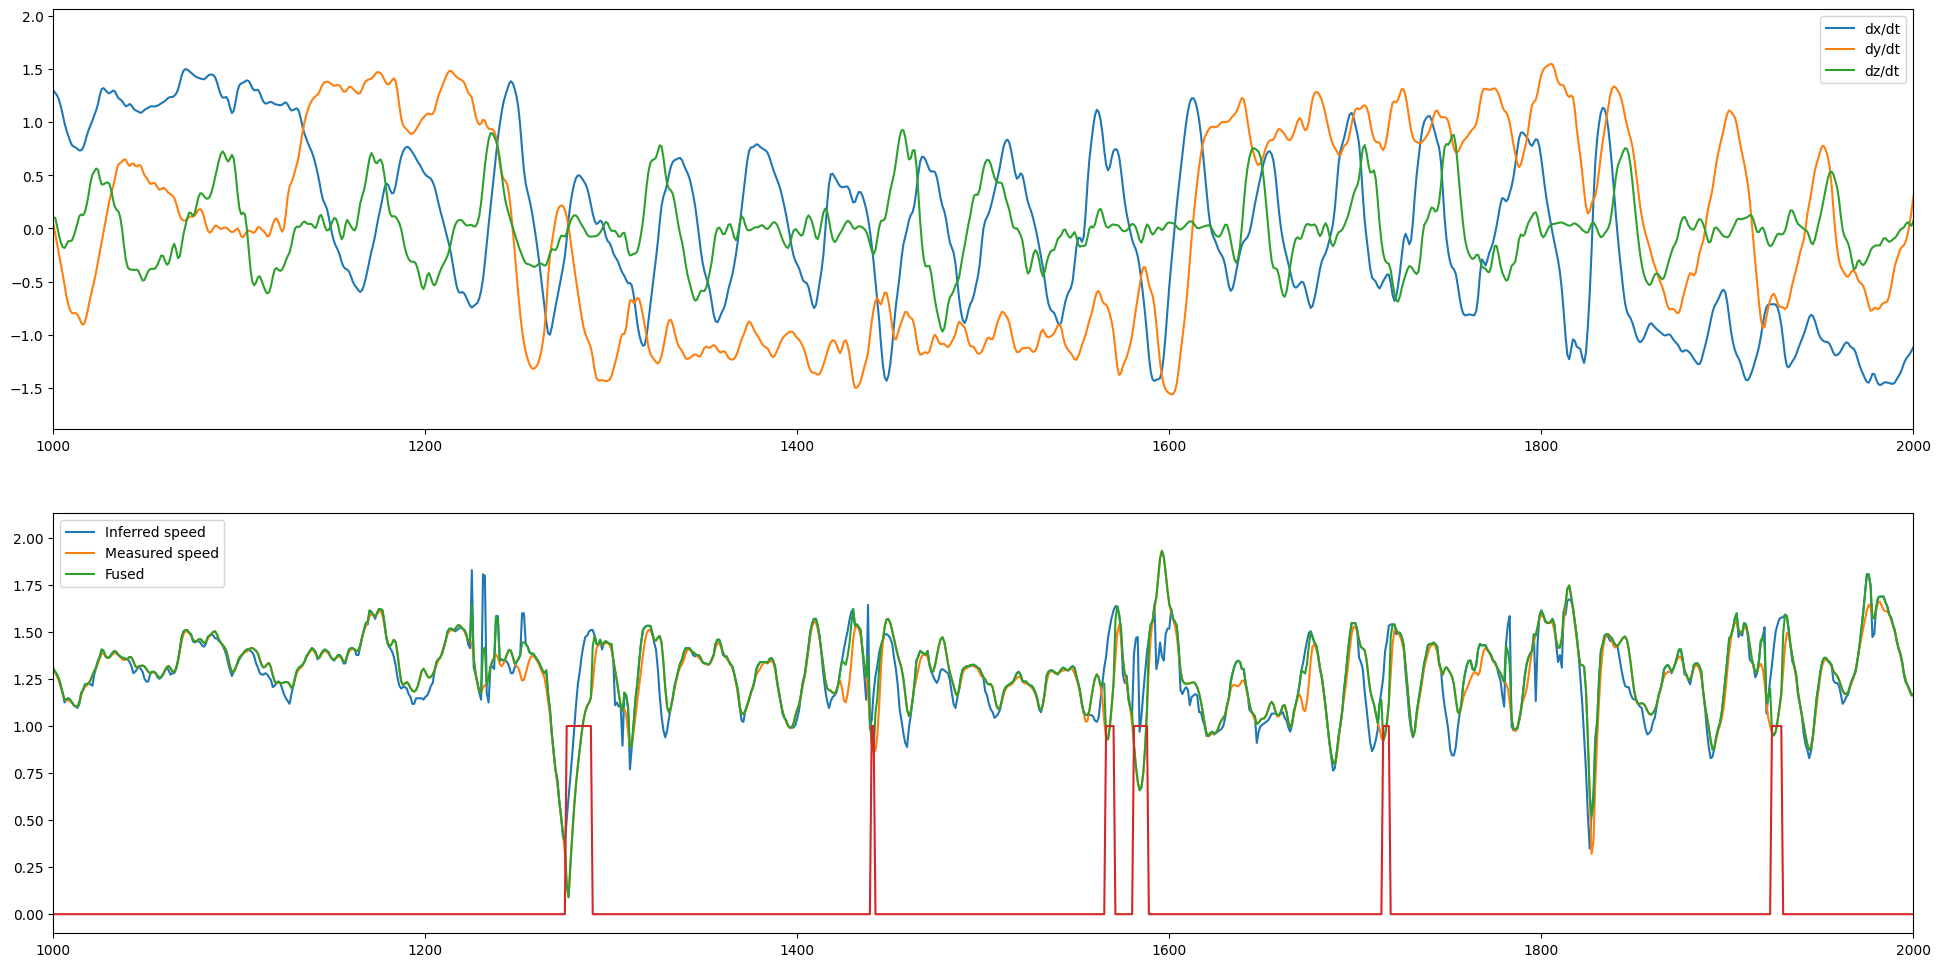

In [84]:
from scipy.ndimage import gaussian_filter1d
from scipy.signal import medfilt


fig, axs = plt.subplots(2, 1, figsize=(24, 12))

vel = gaussian_filter1d(np.array(f['vel']), sigma=1.0, axis=0)
speed_radar = np.array(f['speed'])
speed_slam = np.linalg.norm(vel, axis=1)
# t = np.array(f['t']) - f['t'][0]
t = np.arange(vel.shape[0])

ax = axs[0]
ax.plot(t, vel[:, 0], label='dx/dt')
ax.plot(t, vel[:, 1], label='dy/dt')
ax.plot(t, vel[:, 2], label='dz/dt')
ax.legend()

ax = axs[1]
ax.plot(t, speed_radar, label='Inferred speed')
ax.plot(t, speed_slam, label='Measured speed')


reject = medfilt((speed_slam + 0.3 < speed_radar).astype(int), kernel_size=7)

speed_fused = np.where(
    reject | (speed_slam > speed_radar), speed_slam,
    np.minimum(
        speed_slam + 0.2, speed_radar,
        medfilt(speed_radar, kernel_size=15)))

ax.plot(t, speed_fused, label='Fused')
ax.plot(reject)
ax.legend()

# axs[1].set_ylim(0, 1.5)
for ax in axs:
    ax.set_xlim(1000, 2000)

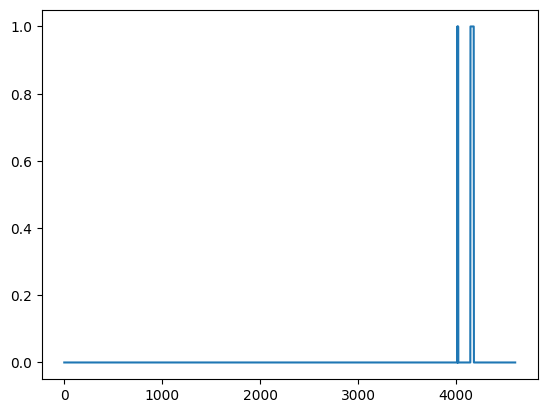

In [69]:
plt.plot()